In [339]:
#CrossValidation
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna crossValidation basada en reglas personalizadas
# Regla : Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['crossValidation'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para Random Forest
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['crossValidation']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validación cruzada para el modelo sin SMOTE
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
scores_sin_smote = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='f1_macro')
print("F1-Score promedio (sin SMOTE):", scores_sin_smote.mean())

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Validación cruzada para el modelo con SMOTE
rf_model_smote = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
scores_con_smote = cross_val_score(rf_model_smote, X_resampled, y_resampled, cv=5, scoring='f1_macro')
print("F1-Score promedio (con SMOTE):", scores_con_smote.mean())

# Comparación de resultados
print("\nComparación de resultados:")
print("Sin SMOTE:")
print("F1-Scores por validación:", scores_sin_smote)
print("Promedio:", scores_sin_smote.mean())
print("\nCon SMOTE:")
print("F1-Scores por validación:", scores_con_smote)
print("Promedio:", scores_con_smote.mean())


F1-Score promedio (sin SMOTE): 0.9623448054963701
F1-Score promedio (con SMOTE): 0.9918317344852167

Comparación de resultados:
Sin SMOTE:
F1-Scores por validación: [0.98592133 0.99538095 0.99538095 0.99538047 0.83966032]
Promedio: 0.9623448054963701

Con SMOTE:
F1-Scores por validación: [0.99723373 1.         0.99861592 0.9972318  0.96607723]
Promedio: 0.9918317344852167



Comparación de resultados:
Sin SMOTE:
F1-Scores por validación: [0.98592133 0.99538095 0.99538095 0.99538047 0.83966032]
Promedio: 0.9623448054963701

Con SMOTE:
F1-Scores por validación: [0.99723373 1.         0.99861592 0.9972318  0.96607723]
Promedio: 0.9918317344852167


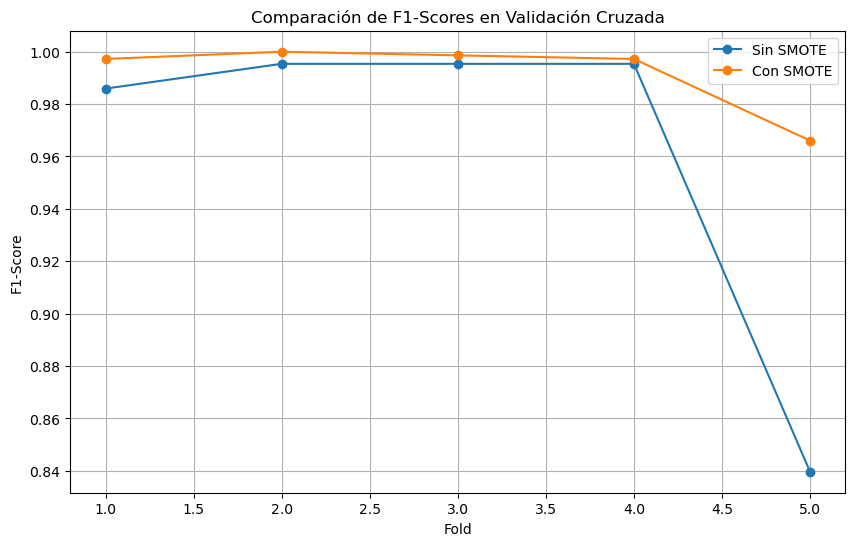

In [344]:
#CROSS VALIDATION
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna crossValidation basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['crossValidation'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para Random Forest
columnas_pca = ['PC1', 'PC2'] 
X = data[columnas_pca]
y = data['crossValidation']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validación cruzada para el modelo sin SMOTE
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
scores_sin_smote = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='f1_macro')

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Validación cruzada para el modelo con SMOTE
rf_model_smote = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
scores_con_smote = cross_val_score(rf_model_smote, X_resampled, y_resampled, cv=5, scoring='f1_macro')

# Comparación de resultados
print("\nComparación de resultados:")
print("Sin SMOTE:")
print("F1-Scores por validación:", scores_sin_smote)
print("Promedio:", scores_sin_smote.mean())
print("\nCon SMOTE:")
print("F1-Scores por validación:", scores_con_smote)
print("Promedio:", scores_con_smote.mean())

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores_sin_smote, label='Sin SMOTE', marker='o')
plt.plot(range(1, 6), scores_con_smote, label='Con SMOTE', marker='o')
plt.title("Comparación de F1-Scores en Validación Cruzada")
plt.xlabel("Fold")
plt.ylabel("F1-Score")
plt.legend()
plt.grid(True)
plt.show()
